In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dataset/dataset_flujo_vehicular.csv")

In [3]:
df

,CODIGO_LOCACION,HORA,CANTIDAD,SENTIDO,LATITUD,LONGITUD
0,48Q3CJ00+,31MAR2020:15:00:00,729,Interna,-34.588796,-58.381520
1,48Q3CJ00+,31MAR2020:15:00:00,447,Egreso,-34.588796,-58.381520
2,48Q39G00+,31MAR2020:15:00:00,175,Interna,-34.633299,-58.468594
3,48Q39G00+,31MAR2020:15:00:00,1186,Egreso,-34.633299,-58.468594
4,48Q3CH00+,31MAR2020:15:00:00,35,Egreso,-34.579632,-58.427733
...,...,...,...,...,...,...
189809,48Q39G00+,26JAN2022:15:00:00,6542,Ingreso,-34.633299,-58.468594
189810,48Q39G00+,26JAN2022:15:00:00,1168,Interna,-34.633299,-58.468594
189811,48Q39G00+,26JAN2022:16:00:00,7870,Egreso,-34.633299,-58.468594
189812,48Q39G00+,26JAN2022:16:00:00,5991,Ingreso,-34.633299,-58.468594


In [4]:
# separar la columna Hora en fecha y hora  

df['Fecha'] = df['HORA'].apply(lambda x: x.split(':')[0])
df['Hora_s'] = df['HORA'].apply(lambda x: x.split(':')[1:4])

In [5]:
df.head()
# campo hora queda cmo lista

,CODIGO_LOCACION,HORA,CANTIDAD,SENTIDO,LATITUD,LONGITUD,Fecha,Hora_s
0,48Q3CJ00+,31MAR2020:15:00:00,729,Interna,-34.588796,-58.381520,31MAR2020,"[15, 00, 00]"
1,48Q3CJ00+,31MAR2020:15:00:00,447,Egreso,-34.588796,-58.381520,31MAR2020,"[15, 00, 00]"
2,48Q39G00+,31MAR2020:15:00:00,175,Interna,-34.633299,-58.468594,31MAR2020,"[15, 00, 00]"
3,48Q39G00+,31MAR2020:15:00:00,1186,Egreso,-34.633299,-58.468594,31MAR2020,"[15, 00, 00]"
4,48Q3CH00+,31MAR2020:15:00:00,35,Egreso,-34.579632,-58.427733,31MAR2020,"[15, 00, 00]"


In [6]:
# Elimina la columna original "HORA" 
df.drop(columns=['HORA'], inplace=True)

In [7]:
# vuelvo a su formato hora
df["Hora"] = df['Hora_s'].apply(lambda x: f"{x[0]:02}:{x[1]:02}:{x[2]:02}")


In [8]:
# elimino la columna con el formato de lista  
df.drop(columns=['Hora_s'], inplace=True)

In [9]:
df

,CODIGO_LOCACION,CANTIDAD,SENTIDO,LATITUD,LONGITUD,Fecha,Hora
0,48Q3CJ00+,729,Interna,-34.588796,-58.381520,31MAR2020,15:00:00
1,48Q3CJ00+,447,Egreso,-34.588796,-58.381520,31MAR2020,15:00:00
2,48Q39G00+,175,Interna,-34.633299,-58.468594,31MAR2020,15:00:00
3,48Q39G00+,1186,Egreso,-34.633299,-58.468594,31MAR2020,15:00:00
4,48Q3CH00+,35,Egreso,-34.579632,-58.427733,31MAR2020,15:00:00
...,...,...,...,...,...,...,...
189809,48Q39G00+,6542,Ingreso,-34.633299,-58.468594,26JAN2022,15:00:00
189810,48Q39G00+,1168,Interna,-34.633299,-58.468594,26JAN2022,15:00:00
189811,48Q39G00+,7870,Egreso,-34.633299,-58.468594,26JAN2022,16:00:00
189812,48Q39G00+,5991,Ingreso,-34.633299,-58.468594,26JAN2022,16:00:00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189814 entries, 0 to 189813
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CODIGO_LOCACION  189814 non-null  object 
 1   CANTIDAD         189814 non-null  int64  
 2   SENTIDO          189814 non-null  object 
 3   LATITUD          186412 non-null  float64
 4   LONGITUD         186412 non-null  float64
 5   Fecha            189814 non-null  object 
 6   Hora             189814 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 10.1+ MB


In [11]:
# Convierte la columna "fecha" a tipo fecha
df['Fecha'] = pd.to_datetime(df['Fecha'])

C:\Users\rulom\AppData\Local\Temp\ipykernel_108\2249399543.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Fecha'] = pd.to_datetime(df['Fecha'])


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189814 entries, 0 to 189813
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   CODIGO_LOCACION  189814 non-null  object        
 1   CANTIDAD         189814 non-null  int64         
 2   SENTIDO          189814 non-null  object        
 3   LATITUD          186412 non-null  float64       
 4   LONGITUD         186412 non-null  float64       
 5   Fecha            189814 non-null  datetime64[ns]
 6   Hora             189814 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 10.1+ MB


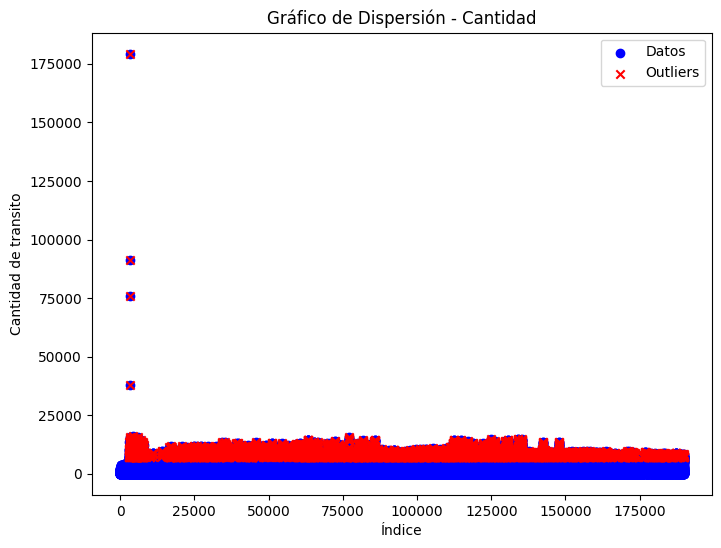

In [13]:
# Gráfico de dispersión para el campo 'CANTIDAD'
plt.figure(figsize=(8, 6))
plt.scatter(range(len(df)), df['CANTIDAD'], marker='o', color='b', label='Datos')
outliers_precio = df[df['CANTIDAD'] > df['CANTIDAD'].quantile(0.95)]
plt.scatter(outliers_precio.index, outliers_precio['CANTIDAD'], marker='x', color='r', label='Outliers')
plt.title('Gráfico de Dispersión - Cantidad')
plt.xlabel('Índice')
plt.ylabel('Cantidad de transito')
plt.legend()
plt.show()

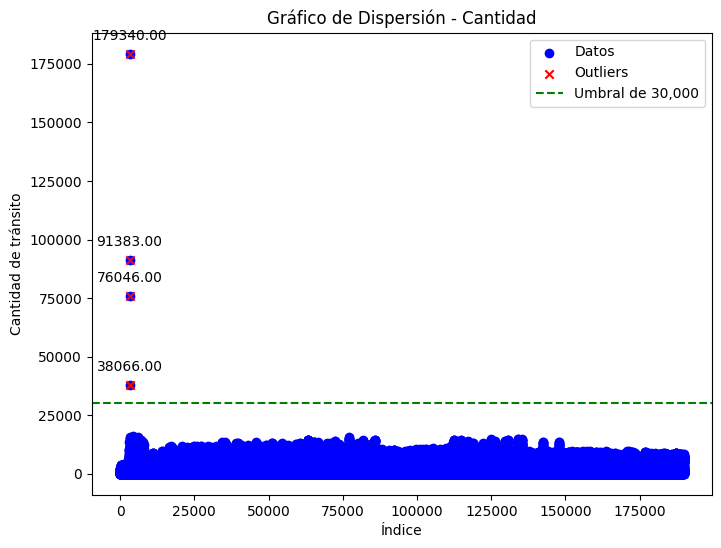

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(df)), df['CANTIDAD'], marker='o', color='b', label='Datos')

# Filtra los outliers que estén por encima de 30,000
umbral = 30000
outliers_precio = df[df['CANTIDAD'] > umbral]

plt.scatter(outliers_precio.index, outliers_precio['CANTIDAD'], marker='x', color='r', label='Outliers')
plt.axhline(umbral, color='g', linestyle='--', label='Umbral de 30,000')
plt.title('Gráfico de Dispersión - Cantidad')
plt.xlabel('Índice')
plt.ylabel('Cantidad de tránsito')

# Agrega etiquetas solo a los puntos de outliers
for i, row in outliers_precio.iterrows():
    plt.annotate(f"{row['CANTIDAD']:.2f}", (i, row['CANTIDAD']), textcoords="offset points", xytext=(0,10), ha='center')

plt.legend()
plt.show()

In [15]:
df[df["CANTIDAD"] > 30000]

,CODIGO_LOCACION,CANTIDAD,SENTIDO,LATITUD,LONGITUD,Fecha,Hora
3207,48Q3CJ00+,76046,Interna,-34.588796,-58.381520,2020-03-18,16:00:00
3209,48Q3CH00+,38066,Interna,-34.579632,-58.427733,2020-03-18,16:00:00
3211,48Q39J00+,179340,Interna,-34.608550,-58.372951,2020-03-18,16:00:00
3212,48Q39H00+,91383,Interna,-34.618036,-58.410236,2020-03-18,16:00:00


In [16]:
# me quedo solo con los datos que estan por debajo de 30k en cantidad  
df = df[df["CANTIDAD"] < 30000]

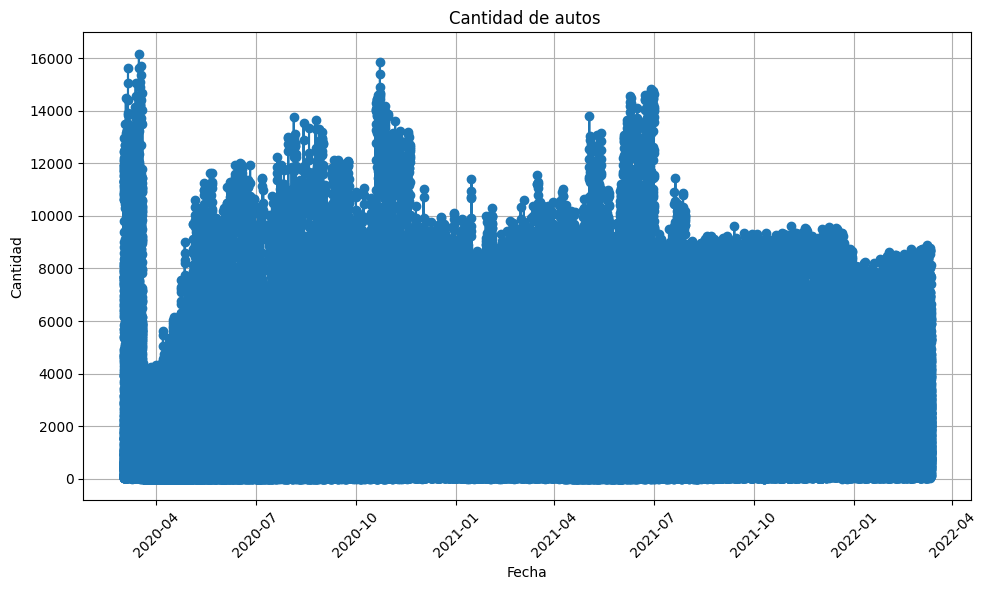

In [17]:
# Creo el gráfico de cantidad en función de la fecha
plt.figure(figsize=(10, 6))
plt.plot(df['Fecha'], df['CANTIDAD'], marker='o', linestyle='-')
plt.title('Cantidad de autos ')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()

plt.show()

C:\Users\rulom\AppData\Local\Temp\ipykernel_108\3432862969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['Fecha'].dt.year
C:\Users\rulom\AppData\Local\Temp\ipykernel_108\3432862969.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['Fecha'].dt.month


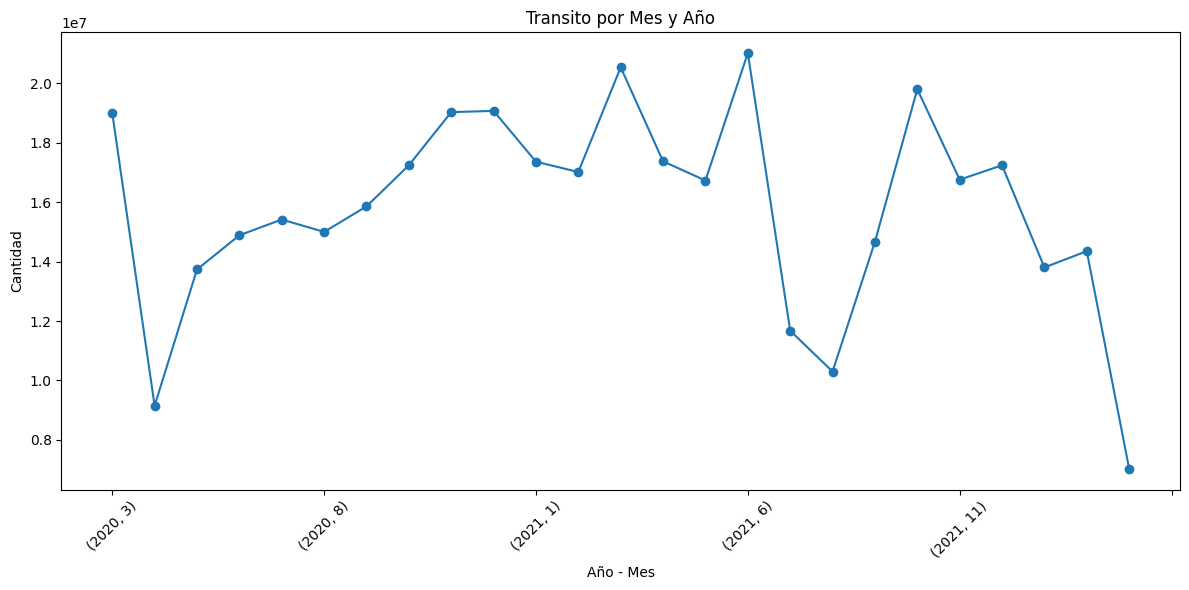

In [18]:
# Extrae el mes y el año de la columna 'Fecha'
df['year'] = df['Fecha'].dt.year
df['month'] = df['Fecha'].dt.month

# Agrupa las cantidad por mes y año y calcula la suma del transito para cada combinación de mes y año
cantidad_por_mes_y_año = df.groupby(['year', 'month'])['CANTIDAD'].sum()

# Grafica la cantidad de transito por mes y año 
fig, ax = plt.subplots(figsize=(12, 6))
cantidad_por_mes_y_año.plot(marker='o', linestyle='-', ax=ax)
plt.xlabel('Año - Mes')
plt.ylabel('Cantidad')
plt.title('Transito por Mes y Año')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()